In [3]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('MSAS_zrav873').getOrCreate() 

In all I'm having 9 datasets, which I will be exploring below.


In [4]:
fte=spark.read.csv("My datasets/full-time_employ_rate.csv",header=True,inferSchema=True)

In [5]:
fte.show()

+--------------+-----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|       Country|  Sex|1995_fte|1996_fte|1997_fte|1998_fte|1999_fte|2000_fte|2001_fte|2002_fte|2003_fte|2004_fte|2005_fte|2006_fte|2007_fte|2008_fte|2009_fte|2010_fte|2011_fte|2012_fte|2013_fte|2014_fte|2015_fte|2016_fte|
+--------------+-----+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|     Australia|  Men|    null|    null|    null|    null|    null|    null|    80.3|    80.2|    80.5|    80.8|    81.6|    81.4|    82.3|    82.3|    79.4|    80.0|    80.2|    79.8|    78.7|    77.7|    77.9|    77.2|
|     Australia|Women|    null|    null|    null|    null|    null|    null|    47.9|    48.0|    48.7|    49.0|    

In [35]:
import pandas as pd
data = pd.read_csv('My datasets/full-time_employ_rate.csv',index_col='Country')
data.head()

,Sex,1995_fte,1996_fte,1997_fte,1998_fte,1999_fte,2000_fte,2001_fte,2002_fte,2003_fte,...,2007_fte,2008_fte,2009_fte,2010_fte,2011_fte,2012_fte,2013_fte,2014_fte,2015_fte,2016_fte
Country,,,,,,,,,,,,,,,,,,,,,
Australia,Men,NaN,NaN,NaN,NaN,NaN,NaN,80.3,80.2,80.5,...,82.3,82.3,79.4,80.0,80.2,79.8,78.7,77.7,77.9,77.2
Australia,Women,NaN,NaN,NaN,NaN,NaN,NaN,47.9,48.0,48.7,...,51.8,52.4,51.6,51.3,51.8,51.8,51.7,51.1,52.1,52.3
Austria,Men,80.6,79.6,79.7,79.2,79.9,79.6,78.4,78.1,77.9,...,82.4,82.0,80.0,79.8,80.0,79.6,78.4,76.9,76.5,76.7
Austria,Women,52.9,52.4,52.6,52.0,52.1,52.1,51.9,52.6,52.7,...,53.3,54.1,53.7,53.8,54.0,54.3,54.1,53.5,53.5,54.0
Belgium,Men,67.9,67.4,68.1,69.0,68.6,70.7,70.1,69.7,68.4,...,69.7,69.0,67.5,68.2,67.9,67.8,67.9,66.9,66.4,67.2


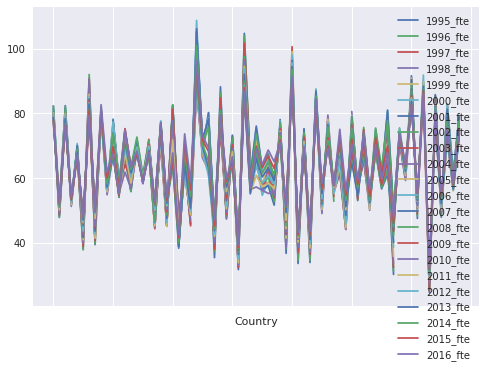

In [36]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data.plot(); #seaborn style used

In [32]:
fte.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- 1995_fte: double (nullable = true)
 |-- 1996_fte: double (nullable = true)
 |-- 1997_fte: double (nullable = true)
 |-- 1998_fte: double (nullable = true)
 |-- 1999_fte: double (nullable = true)
 |-- 2000_fte: double (nullable = true)
 |-- 2001_fte: double (nullable = true)
 |-- 2002_fte: double (nullable = true)
 |-- 2003_fte: double (nullable = true)
 |-- 2004_fte: double (nullable = true)
 |-- 2005_fte: double (nullable = true)
 |-- 2006_fte: double (nullable = true)
 |-- 2007_fte: double (nullable = true)
 |-- 2008_fte: double (nullable = true)
 |-- 2009_fte: double (nullable = true)
 |-- 2010_fte: double (nullable = true)
 |-- 2011_fte: double (nullable = true)
 |-- 2012_fte: double (nullable = true)
 |-- 2013_fte: double (nullable = true)
 |-- 2014_fte: double (nullable = true)
 |-- 2015_fte: double (nullable = true)
 |-- 2016_fte: double (nullable = true)



In [ ]:
fte.select('Country', 'Sex','2012_fte','2016_fte').groupBy('Sex').mean().show()



#due to missing values, every country doesnot show fte value as per gender